In [131]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt


In [600]:
csvpath = os.path.join("csv-data", "anxiety-depression-data.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csvpath)

# Filter rows where the "state" column is not equal to "United States"
by_state_df = df[(df['State'] != 'United States') & 
                (df['Group'] == 'By State') & 
                (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
by_state_df['Year'] = by_state_df['date_column'].dt.year

state_mean_df = by_state_df.groupby('State')['Value'].mean()
higher_states = state_mean_df.nlargest(3)
lower_states = state_mean_df.nsmallest(3)

yearly_state_mean_df = by_state_df.groupby(['State', 'Year'])['Value'].mean().reset_index()
state_mean_2020_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2020].set_index('State')
state_mean_2021_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2021].set_index('State')
state_mean_2022_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2022].set_index('State')
state_mean_2023_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2023].set_index('State')
higher_states_2020 = state_mean_2020_df['Value'].nlargest(3)
lower_states_2020 = state_mean_2020_df['Value'].nsmallest(3)
higher_states_2021 = state_mean_2021_df['Value'].nlargest(3)
lower_states_2021 = state_mean_2021_df['Value'].nsmallest(3)
higher_states_2022 = state_mean_2022_df['Value'].nlargest(3)
lower_states_2022 = state_mean_2022_df['Value'].nsmallest(3)
higher_states_2023 = state_mean_2023_df['Value'].nlargest(3)
lower_states_2023 = state_mean_2023_df['Value'].nsmallest(3)

highest_states_tot = pd.DataFrame({'Total Avg': higher_states.index,
                     '2020 Avg': higher_states_2020.index,
                     '2021 Avg': higher_states_2021.index,
                     '2022 Avg': higher_states_2022.index,
                     '2023 Avg': higher_states_2023.index})
lowest_states_tot = pd.DataFrame({'Total Avg': lower_states.index,
                     '2020 Avg': lower_states_2020.index,
                     '2021 Avg': lower_states_2021.index,
                     '2022 Avg': lower_states_2022.index,
                     '2023 Avg': lower_states_2023.index})
# print('States with Highest Level of Anxiety and Depression')
# print(highest_states_tot)
# print(' ')
# print('--------------------- ')
# print(' ')
# print('States with Lowest Level of Anxiety and Depression')
# print(lowest_states_tot)

# group1_states = ['South Dakota', 'Minnesota', 'North Dakota']
# group2_states = ['Louisiana', 'Mississippi', 'Oklahoma']
lower_states

/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/2001888048.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/2001888048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['Year'] = by_state_df['date_column'].dt.year


State
South Dakota    28.498387
Minnesota       29.111290
North Dakota    29.566129
Name: Value, dtype: float64

In [477]:
census_csv = os.path.join('csv-data', '2022-census.csv')
census_df = pd.read_csv(census_csv)
drop_columns = ['SUMLEV', 'ESTIMATESBASE2020', 'REGION', 'STATE', 'DIVISION']
population_df = census_df[census_df['NAME'].isin(group1_states + group2_states)].drop(columns=drop_columns)
population_df

south_dakota_row = census_df[census_df['NAME'] == 'South Dakota']
minnesota_row = census_df[census_df['NAME'] == 'Minnesota']
north_dakota_row = census_df[census_df['NAME'] == 'North Dakota']

louisiana_row = census_df[census_df['NAME'] == 'Louisiana']
mississippi_row = census_df[census_df['NAME'] == 'Mississippi']
oklahoma_row = census_df[census_df['NAME'] == 'Oklahoma']

south_dakota_average_population = south_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
south_dakota_pop = round(south_dakota_average_population.values[0])

minnesota_average_population = minnesota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
minnesota_pop = round(minnesota_average_population.values[0])

north_dakota_average_population = north_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
north_dakota_pop = round(north_dakota_average_population.values[0])

louisiana_average_population = louisiana_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
lousiana_pop = round(louisiana_average_population.values[0])

mississippi_average_population = mississippi_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
mississippi_pop = round(mississippi_average_population.values[0])

oklahoma_average_population = oklahoma_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
oklahoma_pop = round(oklahoma_average_population.values[0])

print("Population for South Dakota:",south_dakota_pop)
print("Population for Minnesota:",minnesota_pop)
print("Population for North Dakota:", north_dakota_pop)
print(" ")

print("Population for Louisiana:", lousiana_pop)
print("Population for Mississippi:", mississippi_pop)
print("Population for Oklahoma:", oklahoma_pop)


Population for South Dakota: 897929
Population for Minnesota: 5712836
Population for North Dakota: 778904
 
Population for Louisiana: 4623001
Population for Mississippi: 2949261
Population for Oklahoma: 3991979


In [633]:
#Import data sets
unin_2019_path =  os.path.join('csv-data', '2019-unisured-pop-data.csv')
unin_2021_path =  os.path.join('csv-data', '2021-unisured-pop-data.csv')
unin_2022_path =  os.path.join('csv-data', '2022-unisured-pop-data.csv')
hpsa_total_path =  os.path.join('csv-data', 'hpsa_total.csv')
med_enr_path =  os.path.join('csv-data', 'medicaid-chip-data.csv')
beh_health_path = os.path.join('csv-data', 'Behavioral-Health-Services-Provided-to-the-MedicaidCHIP-Population.csv')
overdose_path =  os.path.join('csv-data', 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
infl_death_path =  os.path.join('csv-data', 'Provisional_Death_Counts_for_Influenza__Pneumonia__and_COVID-19.csv')
death_path =  os.path.join('csv-data', 'Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv')

unin_2019_full_df =  pd.read_csv(unin_2019_path)
unin_2021_full_df =  pd.read_csv(unin_2021_path)
unin_2022_full_df =  pd.read_csv(unin_2022_path)
hpsa_full_df =  pd.read_csv(hpsa_total_path)
med_enr_full_df =  pd.read_csv(med_enr_path)
beh_health_full_df = pd.read_csv(beh_health_path)
overdose_full_df = pd.read_csv(overdose_path)
infl_death_full_df = pd.read_csv(infl_death_path)
death_full_df = pd.read_csv(death_path)

/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/1611654654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_clean_df.rename(columns={'Jurisdiction': 'State Name'}, inplace=True)


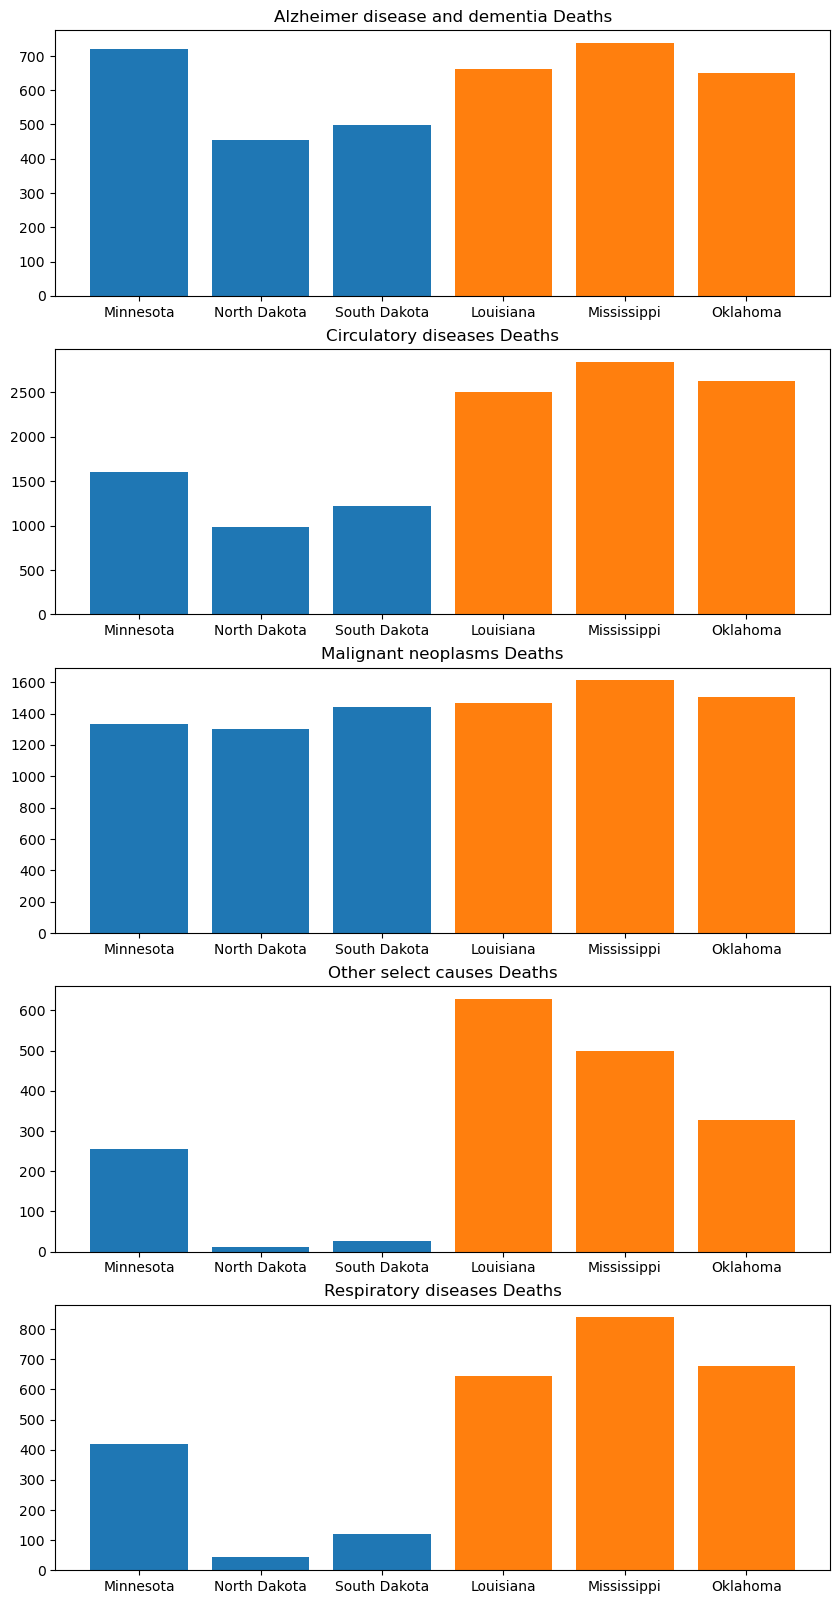

In [722]:
#causes of death
death_clean_df = death_full_df.loc[death_full_df['Time Period']!='2015-2019']
death_clean_df.rename(columns={'Jurisdiction': 'State Name'}, inplace=True)
death_clean_df = pd.merge(death_clean_df, pd.DataFrame(pop), on='State Name')

group1_death_clean_df = death_clean_df.loc[death_clean_df['State Name'].isin(group1_states)]
group1_death_clean_df = group1_death_clean_df.groupby(['Year', 'State Name', 'Population', 'Cause Group'])['Number of Deaths'].sum().reset_index(level='Population')
group1_death_clean_df['Per Capita (100,000 of pop)'] = group1_death_clean_df['Number of Deaths']/(group1_death_clean_df['Population']/100000)
group1_death_clean_df_avg = group1_death_clean_df.groupby(['Cause Group', 'State Name'])['Per Capita (100,000 of pop)'].sum()

group2_death_clean_df = death_clean_df.loc[death_clean_df['State Name'].isin(group2_states)]
group2_death_clean_df = group2_death_clean_df.groupby(['Cause Group', 'Year', 'State Name', 'Population'])['Number of Deaths'].sum().reset_index(level='Population')
group2_death_clean_df['Per Capita (100,000 of pop)'] = group2_death_clean_df['Number of Deaths']/(group2_death_clean_df['Population']/100000)
group2_death_clean_df_avg = group2_death_clean_df.groupby(['Cause Group', 'State Name'])['Per Capita (100,000 of pop)'].sum()

# causes = death_clean_df['Cause Group'].unique()

fig, axs = plt.subplots(5, 1, figsize=(10, 20))
axs = axs.flatten()
i=0
for cause in causes:
    axs[i].bar(group1_death_clean_df_avg[cause].index, group1_death_clean_df_avg[cause])
    axs[i].bar(group2_death_clean_df_avg[cause].index, group2_death_clean_df_avg[cause])
    axs[i].set_title(f'{cause} Deaths')
    i = i+1



In [728]:
#Influenza death
infl_death_clean_df = infl_death_full_df.loc[infl_death_full_df['Age Group'] == "All Ages"]
infl_death_clean_df.rename(columns={'Jurisdiction': 'State Name'}, inplace=True)
infl_death_clean_df = pd.merge(infl_death_clean_df, pd.DataFrame(pop), on='State Name')
group1_infl_death_clean_df = infl_death_clean_df.loc[infl_death_clean_df['State Name'].isin(group1_states)]
group1_infl_death_clean_df = group1_infl_death_clean_df.groupby(['MMWRyear', 'State Name', 'Population'])['Total Deaths'].sum().reset_index(level='Population')
group1_infl_death_clean_df['Per Capita (100,000 of pop)'] = group1_infl_death_clean_df['Total Deaths']/(group1_infl_death_clean_df['Population']/100000)
group1_infl_death_clean_df_tot = group1_infl_death_clean_df.groupby(['MMWRyear','State Name'])['Per Capita (100,000 of pop)'].sum()

group2_infl_death_clean_df = infl_death_clean_df.loc[infl_death_clean_df['State Name'].isin(group2_states)]
group2_infl_death_clean_df = group2_infl_death_clean_df.groupby(['MMWRyear', 'State Name', 'Population'])['Total Deaths'].sum().reset_index(level='Population')
group2_infl_death_clean_df['Per Capita (100,000 of pop)'] = group2_infl_death_clean_df['Total Deaths']/(group2_infl_death_clean_df['Population']/100000)
# group2_infl_death_clean_df_tot = group2_infl_death_clean_df.groupby(['MMWRyear','State Name'])['Per Capita (100,000 of pop)'].sum()
group2_infl_death_clean_df_tot = group2_infl_death_clean_df.groupby(['State Name', 'MMWRyear'])['Per Capita (100,000 of pop)'].sum()
group2_infl_death_clean_df_tot 
# fig, axs = plt.subplots(4, 1, figsize=(6, 10))
# i = 0

# for year in [2020, 2021, 2022, 2023]:
#     plot1 = []
#     plot2 = []
#     plot1 = axs[i].bar(pd.DataFrame(group1_infl_death_clean_df_tot[year]).index, group1_infl_death_clean_df_tot[year])
#     plot2 = axs[i].bar(pd.DataFrame(group2_infl_death_clean_df_tot[year]).index, group2_infl_death_clean_df_tot[year])
#     i = i+1

group2_infl_death_clean_df_tot['Louisiana'].index






/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3512274740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infl_death_clean_df.rename(columns={'Jurisdiction': 'State Name'}, inplace=True)


Index([2020, 2021, 2022, 2023], dtype='int64', name='MMWRyear')

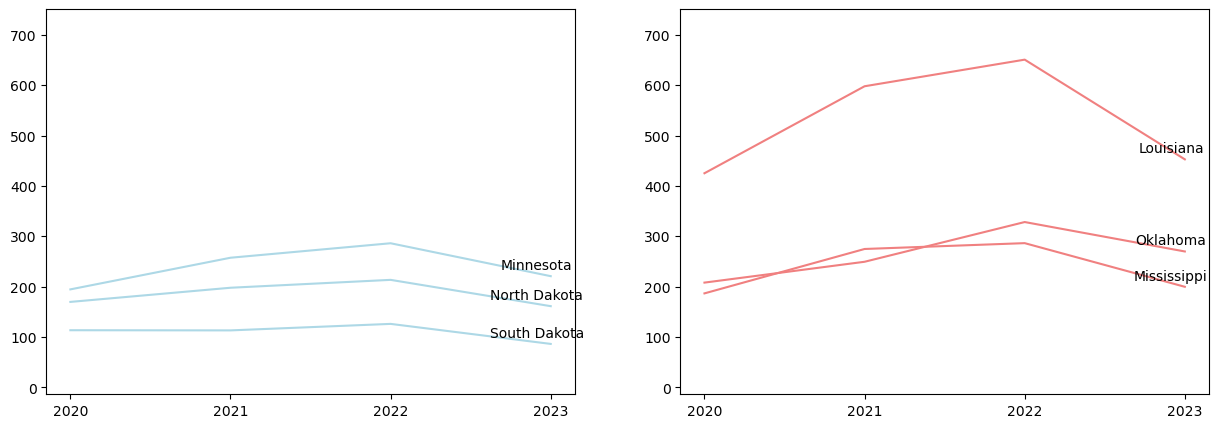

In [761]:
#Death overdoses
pop = {'State Name' : ['Louisiana', 'Mississippi', 'Oklahoma', 'South Dakota', 'Minnesota',  'North Dakota'],
              'Population' : [lousiana_pop, mississippi_pop, oklahoma_pop, south_dakota_pop, minnesota_pop, north_dakota_pop]}
overdose_clean_df = overdose_full_df.loc[(overdose_full_df['Indicator'] == 'Number of Drug Overdose Deaths') 
                                        & (overdose_full_df['Year'] >= 2020)]
overdose_clean_df = pd.merge(overdose_clean_df, pd.DataFrame(pop), on='State Name')
group1_overdose_clean_df = overdose_clean_df.loc[overdose_clean_df['State Name'].isin(group1_states)]
group1_overdose_clean_df = group1_overdose_clean_df.groupby(['Year', 'State Name', 'Population'])['Data Value'].sum().reset_index(level='Population')
group1_overdose_clean_df['Per Capita (100,000 of pop)'] = group1_overdose_clean_df['Data Value']/(group1_overdose_clean_df['Population']/100000)
# group1_overdose_clean_df_tot = group1_overdose_clean_df.groupby(['Year','State Name'])['Per Capita (100,000 of pop)'].sum()
group1_overdose_clean_df_tot = group1_overdose_clean_df.groupby(['State Name', 'Year'])['Per Capita (100,000 of pop)'].sum()

group2_overdose_clean_df = overdose_clean_df.loc[overdose_clean_df['State Name'].isin(group2_states)]
group2_overdose_clean_df = group2_overdose_clean_df.groupby(['Year', 'State Name', 'Population'])['Data Value'].sum().reset_index(level='Population')
group2_overdose_clean_df['Per Capita (100,000 of pop)'] = group2_overdose_clean_df['Data Value']/(group2_overdose_clean_df['Population']/100000)
# group2_overdose_clean_df_tot = group2_overdose_clean_df.groupby(['Year', 'State Name'])['Per Capita (100,000 of pop)'].sum()
group2_overdose_clean_df_tot = group2_overdose_clean_df.groupby(['State Name', 'Year'])['Per Capita (100,000 of pop)'].sum()
group2_overdose_clean_df_tot

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
low_lim = min(group1_overdose_clean_df_tot.min(), group2_overdose_clean_df_tot.min()) - 100
hig_lim = max(group1_overdose_clean_df_tot.max(), group2_overdose_clean_df_tot.max()) + 100

group2_overdose_clean_df_tot
for state in group1_states:
    axs[0].plot(group1_overdose_clean_df_tot[state].index.astype(str), group1_overdose_clean_df_tot[state], color='lightblue')
    axs[0].annotate(state, (group1_overdose_clean_df_tot[state].index[-1].astype(str), group1_overdose_clean_df_tot[state].iloc[-1]),
                 textcoords="offset points", xytext=(-10, 5), ha='center')
    axs[0].set_ylim(low_lim, hig_lim)
for state in group2_states:
    axs[1].plot(group2_overdose_clean_df_tot[state].index.astype(str), group2_overdose_clean_df_tot[state], color='lightcoral')
    axs[1].annotate(state, (group2_overdose_clean_df_tot[state].index[-1].astype(str), group2_overdose_clean_df_tot[state].iloc[-1]),
                 textcoords="offset points", xytext=(-10, 5), ha='center')
    axs[1].set_ylim(low_lim, hig_lim)

# fig, axs = plt.subplots(4, 1, figsize=(6, 10))
# i = 0
# for year in [2020, 2021, 2022, 2023]:
#     plot1 = []
#     plot2 = []
#     plot1 = axs[i].bar(pd.DataFrame(group1_overdose_clean_df_tot[year]).index, group1_overdose_clean_df_tot[year])
#     plot2 = axs[i].bar(pd.DataFrame(group2_overdose_clean_df_tot[year]).index, group2_overdose_clean_df_tot[year])
#     i = i+1
# fig, axs = plt.subplots(2, 1, figsize=(6, 10))
# axs[0].bar(group2_overdose_clean_df_tot['Oklahoma'], group2_overdose_clean_df_tot, color='blue', label='Group 1')



In [544]:
# Leading cause of death

group1_pop = [south_dakota_pop, minnesota_pop, north_dakota_pop]
group2_pop = [lousiana_pop, mississippi_pop, oklahoma_pop]

group1_beh_health_clean_df = []
for states in lower_states.index:
    group1_beh_health_clean_df.append(beh_health_full_df.loc[(beh_health_full_df['State'] == states) & 
    (beh_health_full_df['Year'] != 2018)])
group1_beh_health_clean_df =  pd.concat(group1_beh_health_clean_df, ignore_index = 'true')[['State', 'Year', 'Condition', 'RatePer1000Beneficiaries']]
group1_beh_health_clean_df['RatePer1000Beneficiaries'] = group1_beh_health_clean_df['RatePer1000Beneficiaries'].str.replace(',', '').astype(float)
group1_beh_health_clean_df = group1_beh_health_clean_df.groupby(['State', 'Condition'])['RatePer1000Beneficiaries'].mean().reset_index()
group1_beh_health_clean_df = group1_beh_health_clean_df.set_index('Condition')

group2_beh_health_clean_df = []
for states in higher_states.index:
    group2_beh_health_clean_df.append(beh_health_full_df.loc[(beh_health_full_df['State'] == states) & 
    (beh_health_full_df['Year'] != 2018)])
group2_beh_health_clean_df =  pd.concat(group2_beh_health_clean_df, ignore_index = 'true')[['State', 'Year', 'Condition', 'RatePer1000Beneficiaries']]
group2_beh_health_clean_df['RatePer1000Beneficiaries'] = pd.to_numeric(group2_beh_health_clean_df['RatePer1000Beneficiaries'].str.replace(',', ''), errors='coerce')
group2_beh_health_clean_df = group2_beh_health_clean_df.groupby(['State', 'Condition'])['RatePer1000Beneficiaries'].mean().reset_index()

group2_beh_health_clean_df = group2_beh_health_clean_df.set_index('Condition')
print(group2_beh_health_clean_df)



axs[0].bar(group1_beh_health_clean_df.loc['Mental health disorder']['State'], 
           group1_beh_health_clean_df.loc['Mental health disorder']['RatePer1000Beneficiaries'], color='blue', label='Group 1')
axs[0].bar(group2_beh_health_clean_df.loc['Mental health disorder']['State'], 
           group2_beh_health_clean_df.loc['Mental health disorder']['RatePer1000Beneficiaries'], color='red', label='Group 1')
axs[0].set_title('Mental Health Disorder')

axs[1].bar(group1_beh_health_clean_df.loc['Substance use disorder']['State'], 
           group1_beh_health_clean_df.loc['Substance use disorder']['RatePer1000Beneficiaries'], color='blue', label='Group 1')
axs[1].bar(group2_beh_health_clean_df.loc['Substance use disorder']['State'], 
           group2_beh_health_clean_df.loc['Substance use disorder']['RatePer1000Beneficiaries'], color='red', label='Group 1')
axs[1].set_title('Substance use disorder')


                              State  RatePer1000Beneficiaries
Condition                                                    
Mental health disorder    Louisiana                 29.087083
Substance use disorder    Louisiana                  9.180417
Mental health disorder  Mississippi                 17.379167
Substance use disorder  Mississippi                  1.639749
Mental health disorder     Oklahoma                 40.082917
Substance use disorder     Oklahoma                  4.935417


Text(0.5, 1.0, 'Substance use disorder')

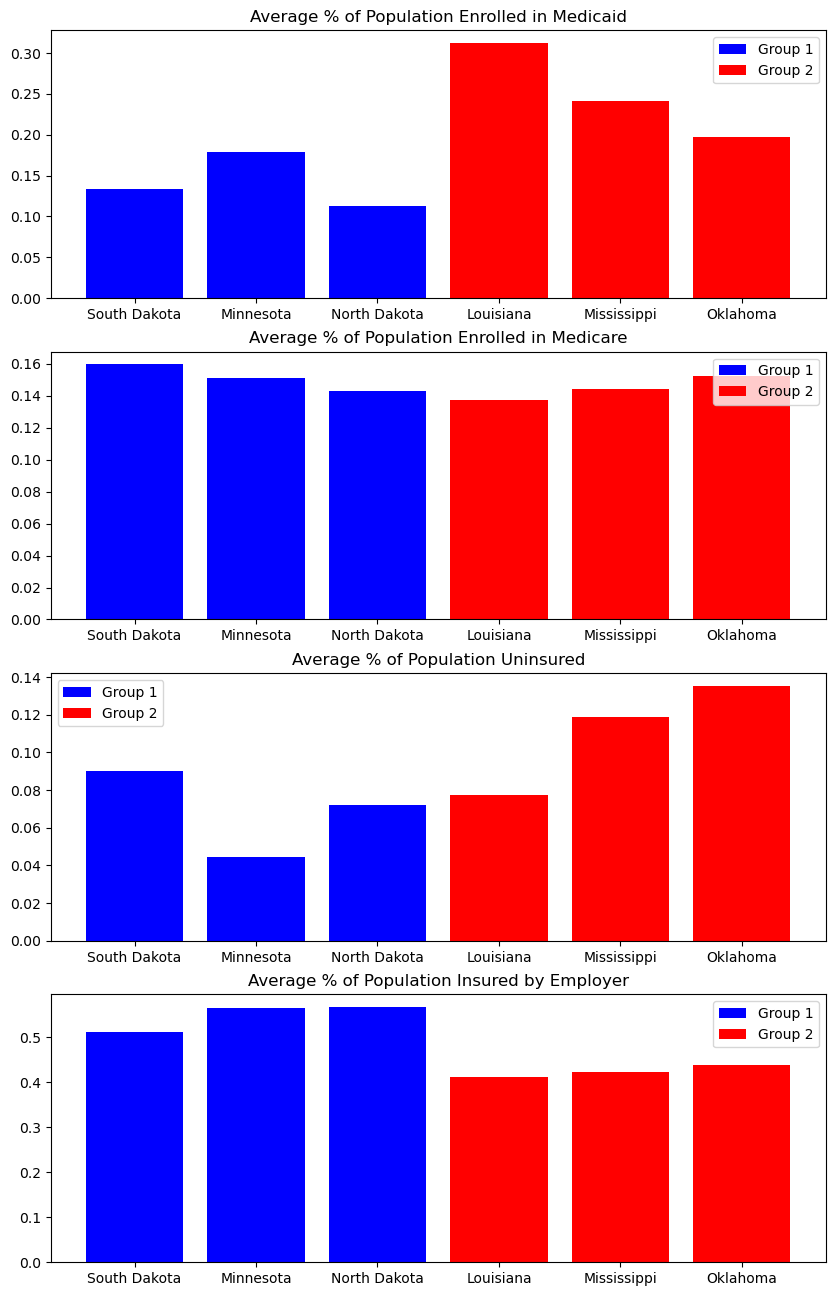

In [444]:
#Uninsured and Insured Data Set
in_clean_df = pd.merge(unin_2019_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], 
                        unin_2021_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], on = 'Location')
in_clean_df = pd.merge(in_clean_df, unin_2022_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], on = 'Location').dropna(how='any')

group1_state_in_clean_df = []
for states in lower_states.index:
    group1_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group1_state_in_clean_df = pd.concat(group1_state_in_clean_df, ignore_index=True)
group1_state_in_clean_df = group1_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                        'Uninsured_2021',
                                                                        'Uninsured_2022']], axis=1)
avg_employer_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                       'Employer_2021',
                                                                       'Employer_2022']], axis=1)
group2_state_in_clean_df = []
for states in higher_states.index:
    group2_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group2_state_in_clean_df = pd.concat(group2_state_in_clean_df, ignore_index=True)
group2_state_in_clean_df = group2_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                       'Uninsured_2021',
                                                                       'Uninsured_2022']], axis=1)
avg_employer_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                       'Employer_2021',
                                                                       'Employer_2022']], axis=1)

fig, axs = plt.subplots(4, 1, figsize=(10, 16))
axs[0].bar(avg_medicaid_g1.index, avg_medicaid_g1, color='blue', label='Group 1')
axs[0].bar(avg_medicaid_g2.index, avg_medicaid_g2, color='red', label='Group 2')
axs[0].set_title('Average % of Population Enrolled in Medicaid')
axs[0].legend()

axs[1].bar(avg_medicare_g1.index, avg_medicare_g1, color='blue', label='Group 1')
axs[1].bar(avg_medicare_g2.index, avg_medicare_g2, color='red', label='Group 2')
axs[1].set_title('Average % of Population Enrolled in Medicare')
axs[1].legend()

axs[2].bar(avg_uninsured_g1.index, avg_uninsured_g1, color='blue', label='Group 1')
axs[2].bar(avg_uninsured_g2.index, avg_uninsured_g2, color='red', label='Group 2')
axs[2].set_title('Average % of Population Uninsured')
axs[2].legend()

axs[3].bar(avg_employer_g1.index, avg_employer_g1, color='blue', label='Group 1')
axs[3].bar(avg_employer_g2.index, avg_employer_g2, color='red', label='Group 2')
axs[3].set_title('Average % of Population Insured by Employer')
axs[3].legend()



/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3835400513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3835400513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3835400513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')


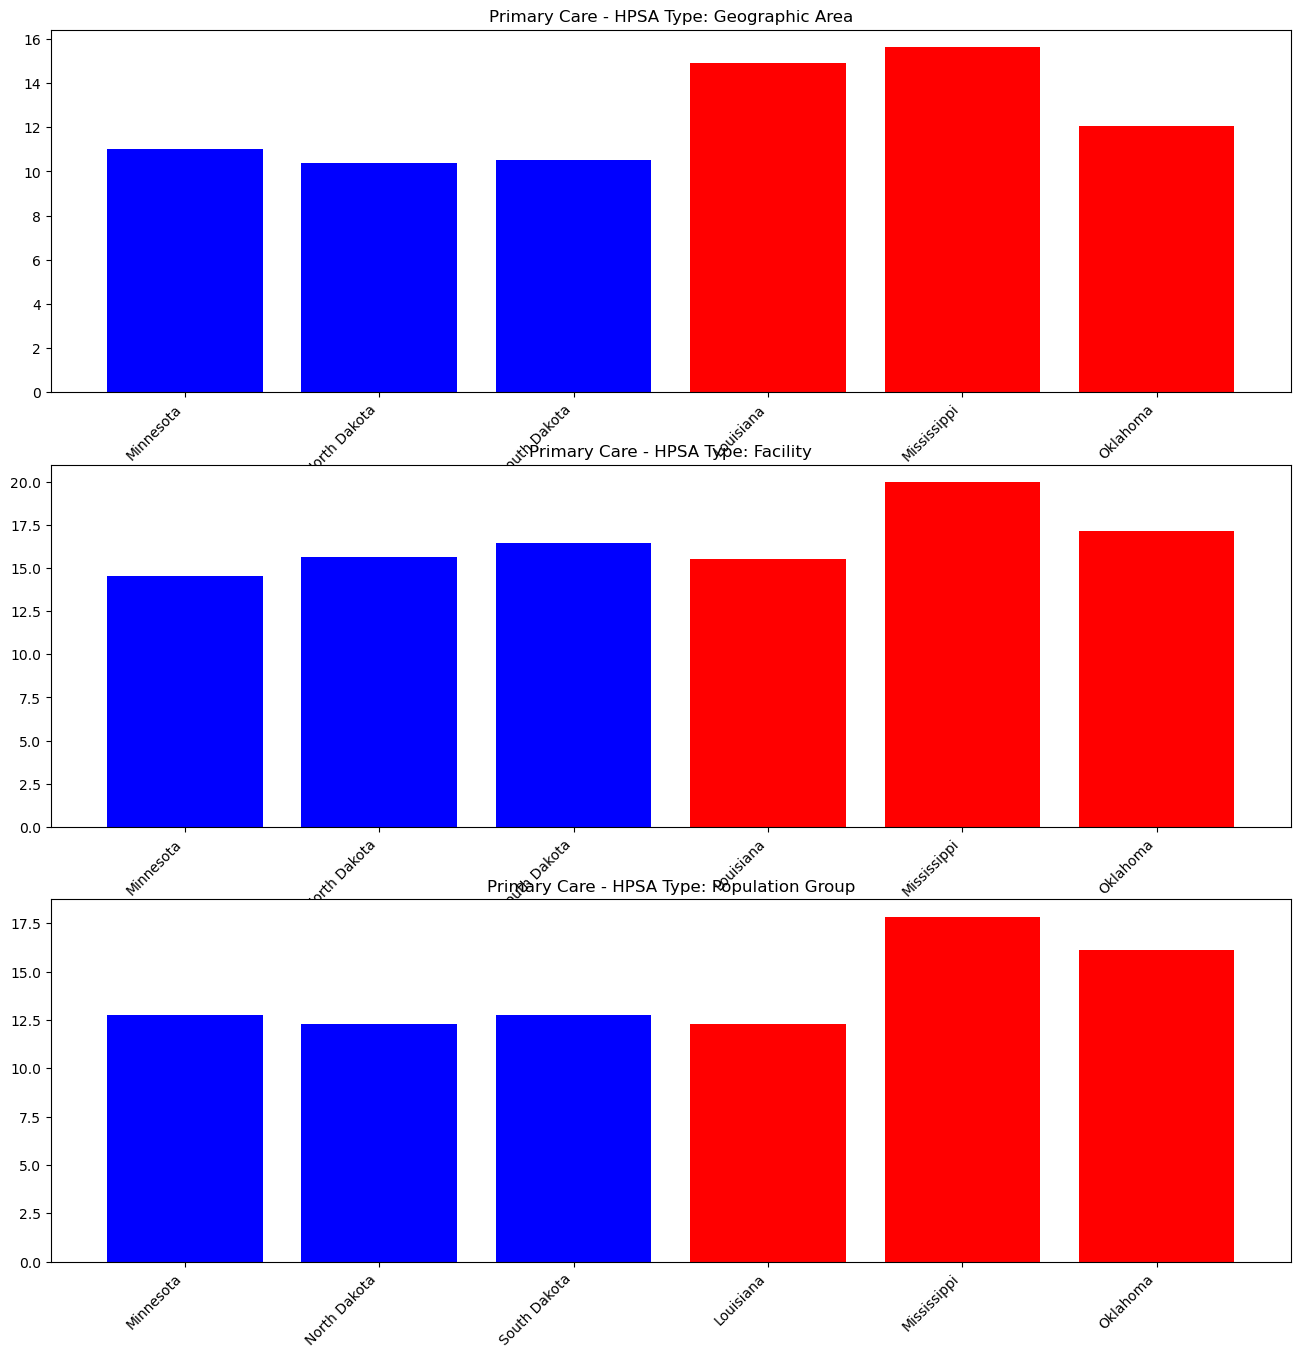

In [631]:
hpsa_clean_df = hpsa_full_df[['Discipline', 'State', 'HPSA Type (Category)', 'HPSA Score']]
disciplines = hpsa_clean_df['Discipline'].unique()
hpsa_cats = hpsa_clean_df['HPSA Type (Category)'].unique()

group1_hpsa_df = hpsa_clean_df[hpsa_clean_df['State'].isin(group1_states)]
group1_hpsa_df = group1_hpsa_df.groupby(['Discipline', 'State', 'HPSA Type (Category)']).mean()

group2_hpsa_df = hpsa_clean_df[hpsa_clean_df['State'].isin(group2_states)]
group2_hpsa_df = group2_hpsa_df.groupby(['Discipline', 'State', 'HPSA Type (Category)']).mean()

fig, axs = plt.subplots(3, =-9, figsize=(16, 16))
axs = axs.flatten()


def hpsa_plots(hpsa_category, disc, i):
        group1_data = group1_hpsa_df.xs(hpsa_category, level='HPSA Type (Category)').xs(disc, level='Discipline')
        axs[i].bar(group1_data.index, group1_data['HPSA Score'], color='blue', label='Group 1')

        group2_data = group2_hpsa_df.xs(hpsa_category, level='HPSA Type (Category)').xs(disc, level='Discipline')
        axs[i].bar(group2_data.index, group2_data['HPSA Score'], color='red', label='Group 2')

        axs[i].set_title(f'{disc} - HPSA Type: {hpsa_category}')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
        
i=0
# for disc in disciplines:
#     for hpsa_category in hpsa_cats:
#         hpsa_plots(hpsa_category, disc, i)
#         i = i+1
        

for hpsa_category in hpsa_cats:
    hpsa_plots(hpsa_category, 'Primary Care', i)
    i = i+1


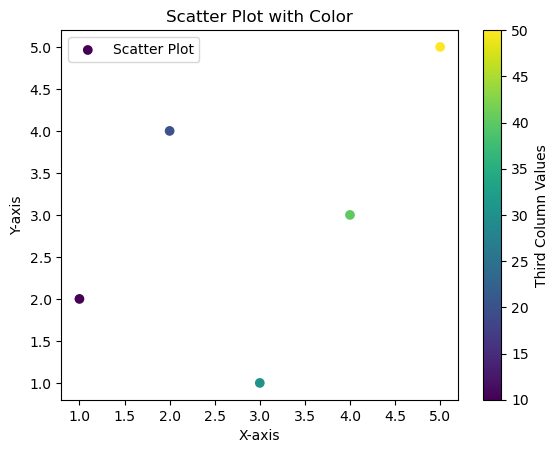

In [763]:
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]
third_column = [10, 20, 30, 40, 50]  # Replace this with your third column data

# Create scatter plot with color based on third column
plt.scatter(x, y, c=third_column, cmap='viridis', label='Scatter Plot')

# Add colorbar
plt.colorbar(label='Third Column Values')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Color')

# Add legend
plt.legend()

# Show the plot
plt.show()
